In [189]:
import numpy as np

In [190]:
def entropy(P):
    H =[]
    for p in P:
        if p == 1 or p == 0:
            H.append(0)
        else :
            H.append(-p*np.log2(p))
    
    return sum(H)

In [191]:

alpha = 0.7706450303
beta = 0.9011422678
#alpha = 0.3
#beta = 0.1

Pylx = np.array([[1-alpha , alpha],[beta , 1-beta]])
print('Pylx =',Pylx)

c =( ((beta**beta)*((1-beta)**(1-beta)))/((alpha**alpha)*((1-alpha)**(1-alpha))) )**(1/(1-alpha-beta))
q = (1-(c+1)*beta)/((1+c)*(1-alpha-beta))
#print(q)

px = np.array([q , 1-q]).reshape((2,1))
py = (px.T@Pylx)[0]

Hy = entropy(py)
Hylx = (sum([px[i]*entropy(Pylx[i,:]) for i in range(len(px))]) )[0]
C = Hy - Hylx

print('px =',px)
print('py =',py)
print('Hy = ',Hy)
print('Hylx = ',Hylx)
print('Capacity = ', C)

Pylx = [[0.22935497 0.77064503]
 [0.90114227 0.09885773]]
px = [[0.47853024]
 [0.52146976]]
py = [0.57967173 0.42032827]
Hy =  0.9816064375026279
Hylx =  0.6144364039450475
Capacity =  0.3671700335575804


In [192]:
#problem 1.2

In [193]:
def dmc(x):
    out_alphabet = ['0','1']
    pygivenx = {'0':Pylx[0,:] , '1':Pylx[1,:] }
    y = np.random.choice(out_alphabet,1,p=list(pygivenx[x]))
    return y[0]

def dmc_n(xn):
    yn = ''
    for x in xn:
        yn += dmc(str(x))
    return yn

#decode using ML rule
def ML_decoder(yn,alpha,beta):
    estimate_x = ''
    for y in yn:
        if 1-alpha > beta:
            estimate_x += y
        else :
            estimate_x += str((int(y)+1)%2)
    return estimate_x

#Hamming Distance
def hamming_distance(xn,yn):
    if len(xn) != len(yn):
        print('Lenths dont match')
        exit()
    else:
        n = len(xn)
        hamming_distance = sum([(int(xn[i])+int(yn[i]))%2 for i in range(n)])
        return hamming_distance

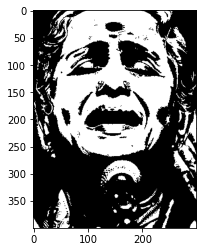

(<matplotlib.image.AxesImage at 0x7fc28ab3ebe0>, None)

In [194]:
import numpy as np
from matplotlib import pyplot as plt
mss = np.load('mss.npy')
plt.imshow(mss,cmap='gray'), plt.show()

In [204]:
inp = mss.flatten()
mk=''
for m in inp:
    mk += str(m)
xn = mk
yn = dmc_n(xn)


In [205]:
print('INPUT MESSAGE : ',xn[45:95])
#print('.............................................................................')
print('CHANNEL OUTPUT :',yn[45:95])

INPUT MESSAGE :  00111111000000000000111111111111111100000000000000
CHANNEL OUTPUT : 11011000011011010110000000000100000010110111110011


error rate =  0.17881666666666668


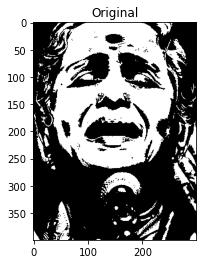

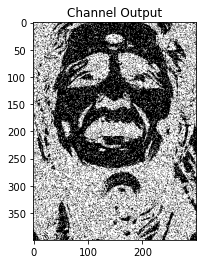

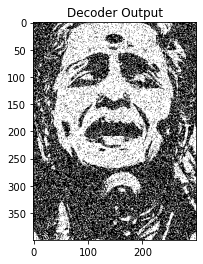

(<matplotlib.image.AxesImage at 0x7fc28a7dceb0>,
 Text(0.5, 1.0, 'Decoder Output'),
 None)

In [206]:
mss_in = np.array([int(x) for x in xn])
mss_in = mss_in.reshape(mss.shape)

mss_out = np.array([int(y) for y in yn])
mss_out = mss_out.reshape(mss.shape)

estimate_xn = ML_decoder(yn,alpha,beta)
mss_estimate = np.array([int(x) for x in estimate_xn]).reshape(mss.shape)

n=len(xn)
error_rate = hamming_distance(xn,estimate_xn)/n

print("error rate = ",error_rate)
plt.imshow(mss_in,cmap='gray'),plt.title('Original'), plt.show() 
plt.imshow(mss_out,cmap='gray'), plt.title('Channel Output') , plt.show()
plt.imshow(mss_estimate,cmap='gray'), plt.title('Decoder Output'),plt.show() 

In [239]:
#problem 1.3 

def repetition_enc(mk , rep):
    k = len(mk)
    xn = ''
    for i in range(k):
        xn = xn + mk[i]*rep
    return xn




In [240]:
#part 1
rep = 3
xn = repetition_enc(mk,rep)
yn = dmc_n(xn)
estimate_xn = ML_decoder(yn,alpha,beta)
n=len(xn)
error_rate = hamming_distance(xn,estimate_xn)/n

print("error rate = ",error_rate)

error rate =  0.17883888888888888


In [241]:
a = '00100111'

In [332]:
#part 2
a = Pylx[0][0]
b = Pylx[0][1]
c = Pylx[1][0]
d = Pylx[1][1]

Py2lx2 = np.array([
[a**2 , a*b , b*a , b**2],
[a*c , a*d , b*c , b*d],
[c*a , c*b , d*a , d*b],
[c**2 , c*d , d*c , d**2]
])

def dmc_block(xx):
    out_alphabet = ['00000', '00111', '11100' , '11011'  ] 
    py2givenx2 = {'00000' : Py2lx2[0,:] , '00111' : Py2lx2[1,:] ,'11100' : Py2lx2[2,:] , '11011' : Py2lx2[3,:]}
    yy = np.random.choice(out_alphabet,1,p=py2givenx2[xx])
    return yy[0]

def dmc_block_n(xn):
    yn = ''
    for i in range(0,len(xn)-4,5):
        yn += dmc_block(str(xn[i:i+5]))
    return yn

def ML_decoder_block(yn,Py2lx2):
    inp_alphabet = {0:'00' , 1: '01', 2 : '10' , 3 :'11'}
    out_alphabet = {'00000' : 0 , '00111' : 1 ,'11100' : 2 ,'11011' : 3}
    estimate_xn =''
    for i in range(0,len(yn)-4,5):
        estimate_xn = estimate_xn + inp_alphabet[np.argmax(Py2lx2[:,out_alphabet[yn[i:i+5]]])]
        #estimate_xn = estimate_xn + inp_alphabet[np.argmax(Py2lx2[:,inp_alphabet[yn[i:i+2]]])]
    return estimate_xn



In [336]:
a = '0010'

encoder = {'00' : '00000', '01' : '00111', '10' : '11100' , '11' : '11011' } 
k = len(a)
xn = ''
for i in range(0,k-1,2):
    xn = xn + encoder[a[i:i+2]]
b =dmc_block_n(xn)
estimate_xn = ML_decoder_block(b,Py2lx2)
#print(Py2lx2)
print('message = ', a)
print('codeword = ',xn)
print('channel output = ',b)
print('decoder output = ',estimate_xn)

message =  0010
codeword =  0000011100
channel output =  1101100111
decoder output =  0010


In [323]:
encoder = {'00' : '00000', '01' : '00111', '10' : '11100' , '11' : '11011' } 
k = len(a)
xn = ''
for i in range(0,k-1,2):
    xn = xn + encoder[a[i:i+2]]
yn = dmc_n(xn)
print(xn)
print(yn)

0000011100
1111101111


In [315]:
estimate_xn = ML_decoder_block(yn,Py2lx2)

KeyError: 2

In [256]:
a = Pylx[0][0]
b = Pylx[0][1]
c = Pylx[1][0]
d = Pylx[1][1]
print(a)
print(b)
print(c)
print(d)

0.22935496970000002
0.7706450303
0.9011422678
0.09885773220000005


In [317]:
Py2lx2 = np.array([
[a**2 , a*b , b*a , b**2],
[a*c , a*d , b*c , b*d],
[c*a , c*b , d*a , d*b],
[c**2 , c*d , d*c , d**2]
])
print(Py2lx2)

[[0.0526037  0.17675127 0.17675127 0.59389376]
 [0.20668146 0.02267351 0.69446081 0.07618422]
 [0.20668146 0.69446081 0.02267351 0.07618422]
 [0.81205739 0.08908488 0.08908488 0.00977285]]


In [318]:
inp_alphabet = {'00' : 0 , '01' : 1 ,'10' : 2 ,'11' : 3}
np.argmax(Py2lx2[:,inp_alphabet[yn[0:2]]])

2

In [267]:
sum(Py2lx2[2,:])

0.9999999999999999

In [302]:
len(yn)

300000

In [309]:
print(mk[46:50])
print(xn[136:148])

0111
000000000000


In [308]:
3*50 - 2

148